
# Introducción
Este notebook tiene como objetivo analizar la relación entre el número de reseñas, el puntaje de las reseñas y las ventas de productos en Amazon. El análisis pretende explorar si existe una correlación significativa entre estos factores para orientar futuras estrategias comerciales.


## **Contexto del problema**
Hoy en día, los marketplaces como **Amazon** reciben millones de reseñas de productos, las cuales influyen en la toma de decisiones de los consumidores. Comprender estas reseñas permite a las empresas mejorar productos, ajustar estrategias de venta, y optimizar la experiencia del cliente. Sin embargo, analizar grandes volúmenes de datos manualmente es ineficiente.

## **Objetivo del proyecto**
Nuestro objetivo es **predecir la valoración general (rating) de un producto** a partir de las características extraídas de las reseñas (como el texto, la cantidad de comentarios útiles o el número de votos). La variable objetivo será, por tanto, el **rating**, y trabajaremos con un enfoque de **clasificación supervisada**.

## **Situación de negocio**
Amazon necesita identificar patrones que lleven a valoraciones bajas o altas para:
1. **Identificar productos mal valorados** y optimizar su oferta.
2. **Mejorar recomendaciones de productos** para diferentes segmentos de clientes.
3. **Automatizar la evaluación** de reseñas en función de ciertos patrones.

---

## **Estructura del Notebook**

### **1. Carga del Dataset**
Se descarga el dataset de Kaggle, se descomprime y se carga en un DataFrame de Pandas para su análisis.

### **2. Análisis Exploratorio**
Se exploran las primeras filas del dataset y se evalúa la existencia de valores nulos.
* Si los nulos representan menos del 5% del total, se eliminan.
* Si superan ese porcentaje, se considerará la imputación.

### **3. Visualización de Datos**
Se emplean gráficos para comprender la distribución de los ratings y detectar posibles outliers.

### **4. Preprocesamiento de Datos**
Se toman medidas para eliminar o imputar valores nulos según corresponda.

### **5. Modelado Predictivo**
Se selecciona un modelo supervisado para predecir el **rating** y se evalúa su desempeño.


#Formulacion de hipótesis:
- Hipótesis 1 : Existe una correlación positiva entre el número de reseñas y el número de reseñas útiles.
- Hipótesis 2: Los productos con un puntaje de reseña más alto tienen una mayor probabilidad de ser recomendados.
- Hipótesis 3: Los productos con más reseñas útiles (mayor interacción) tienden a tener un puntaje de reseña más alto.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.zip to Amazon.zip


In [12]:

# Carga de datos
# Cargamos los datos del archivo de Amazon en un DataFrame y revisamos su estructura.

import pandas as pd

# Cargar datos desde el archivo comprimido
df = pd.read_csv('Amazon.zip', compression='zip')
data = pd.read_csv('Amazon.zip')
data.head()

# Mostrar las primeras filas para entender la estructura
df.head()


,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from textblob import TextBlob

# Analiza el sentimiento de las primeras 5 reseñas
sentiments = df['reviews.text'].apply(lambda x: TextBlob(x).sentiment.polarity)
print(sentiments.head())


0    0.200259
1    0.159591
2    0.420833
3    0.148821
4    0.267086
Name: reviews.text, dtype: float64


In [5]:
print(df.shape)


(1597, 27)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

**reviewerID / customer_id**

Descripción: Identificador único del cliente que dejó la reseña.
Relevancia: Permite analizar hábitos de compra o tendencias de usuarios frecuentes.

**productID / asin **

Descripción: Identificador del producto reseñado.
Relevancia: Es clave para agrupar reseñas por producto y detectar qué productos son más populares o problemáticos.

**rating / overall (de 1 a 5)**

Descripción: Calificación numérica otorgada por el usuario.
Relevancia: Útil para análisis de opiniones, puntuaciones promedio y modelos de recomendación.
Análisis potencial: Distribución de calificaciones, identificación de productos con alta/ baja aceptación.

**review_text / review_body**

Descripción: Contenido textual de la reseña.
Relevancia: Ideal para minería de texto y análisis de sentimientos, identificando emociones o temas frecuentes.

**review_date / timestamp**

Descripción: Fecha de publicación de la reseña.
Relevancia: Permite evaluar cómo cambia la percepción del producto con el tiempo o realizar análisis estacionales.

**verified_purchase**

Descripción: Indica si la compra fue verificada.
Relevancia: Garantiza la autenticidad de la reseña, relevante para evaluar la fiabilidad de las opiniones.

**category / product_category**

Descripción: Categoría del producto (por ejemplo, "Electrónica", "Libros", etc.).
Relevancia: Permite segmentar análisis por industria o tipo de producto.

**helpful_votes / helpful**

Descripción: Número de votos indicando que la reseña fue útil para otros usuarios.
Relevancia: Identifica reseñas de alta calidad y usuarios influyentes en la plataforma.

**price**

Descripción: Precio del producto al momento de la compra.
Relevancia: Se puede correlacionar con la satisfacción del cliente o detectar patrones de precios y valor percibido.

**brand / manufacturer**

Descripción: Marca o fabricante del producto.
Relevancia: Sirve para evaluar la percepción de marcas específicas en el mercado.


In [11]:
# Resumen estadístico: incluye media, desviación estándar, mínimos y máximos
print(df.describe())

                ean  reviews.numHelpful  reviews.rating  reviews.userCity  \
count  8.980000e+02          900.000000     1177.000000               0.0   
mean   8.443135e+11           83.584444        4.359388               NaN   
std    3.416444e+09          197.150238        1.021445               NaN   
min    8.416670e+11            0.000000        1.000000               NaN   
25%    8.416670e+11            0.000000        4.000000               NaN   
50%    8.416670e+11            0.000000        5.000000               NaN   
75%    8.487190e+11           34.000000        5.000000               NaN   
max    8.487190e+11          997.000000        5.000000               NaN   

       reviews.userProvince  sizes           upc  
count                   0.0    0.0  8.980000e+02  
mean                    NaN    NaN  8.443135e+11  
std                     NaN    NaN  3.416444e+09  
min                     NaN    NaN  8.416670e+11  
25%                     NaN    NaN  8.416670e+11  


In [32]:
print(df.columns)


Index(['id', 'asins', 'brand', 'categories', 'colors', 'dateAdded',
       'dateUpdated', 'dimension', 'ean', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'prices', 'reviews.date',
       'reviews.doRecommend', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'upc', 'weight'],
      dtype='object')


In [33]:
# Assuming your data is in a CSV file named 'your_data_file.csv'
# Replace 'your_data_file.csv' with the actual path to your data file
data = pd.read_csv('Amazon.zip')  # Load

In [34]:
import zipfile

# Usar la ruta completa del archivo Amazon.zip
zip_path = '/content/Amazon.zip'

# Extraer el nombre del archivo dentro del zip y cargarlo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Lista de archivos dentro del zip
    csv_file_name = file_names[0]    # Asumimos que el primer archivo es el que necesitas

    # Cargar el archivo CSV directamente desde el zip
    with zip_ref.open(csv_file_name) as csv_file:
        data = pd.read_csv(csv_file)

# Verificar los valores nulos como antes
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

colors                   823
dimension               1032
ean                      699
manufacturer             632
manufacturerNumber       695
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful       697
reviews.rating           420
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


In [35]:

# Mostrar información sobre los valores nulos
missing_values = data.isnull().sum()
missing_values[missing_values > 0]  # Mostrar solo las columnas con valores nulos


,0
colors,823
dimension,1032
ean,699
manufacturer,632
manufacturerNumber,695
reviews.date,380
reviews.doRecommend,1058
reviews.numHelpful,697
reviews.rating,420
reviews.title,17


In [36]:
# Rellenar valores nulos en columnas numéricas con la mediana
data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
data['reviews.numHelpful'].fillna(data['reviews.numHelpful'].median(), inplace=True)


<ipython-input-36-861315b66b95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews.rating'].fillna(data['reviews.rating'].median(), inplace=True)
<ipython-input-36-861315b66b95>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [37]:
# Rellenar valores nulos en columnas de texto con "No especificado"
fill_value_text = "No especificado"
columns_to_fill_text = ['colors', 'dimension', 'manufacturer', 'manufacturerNumber']
data[columns_to_fill_text] = data[columns_to_fill_text].fillna(fill_value_text)


In [38]:
# Comprobar si quedan valores nulos
print(data.isnull().sum())


id                         0
asins                      0
brand                      0
categories                 0
colors                     0
dateAdded                  0
dateUpdated                0
dimension                  0
ean                      699
keys                       0
manufacturer               0
manufacturerNumber         0
name                       0
prices                     0
reviews.date             380
reviews.doRecommend     1058
reviews.numHelpful         0
reviews.rating             0
reviews.sourceURLs         0
reviews.text               0
reviews.title             17
reviews.userCity        1597
reviews.userProvince    1597
reviews.username          17
sizes                   1597
upc                      699
weight                   911
dtype: int64


Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.57      0.47      0.52        36
           1       0.91      0.94      0.92       200

    accuracy                           0.86       236
   macro avg       0.74      0.70      0.72       236
weighted avg       0.86      0.86      0.86       236



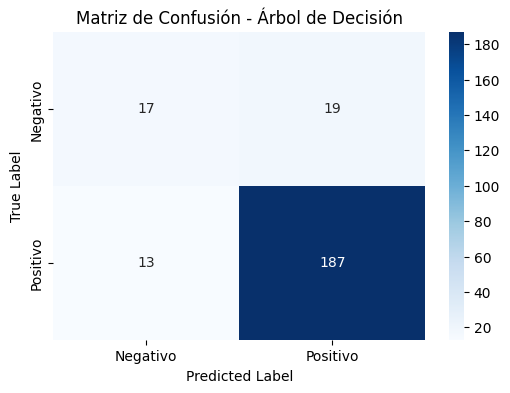

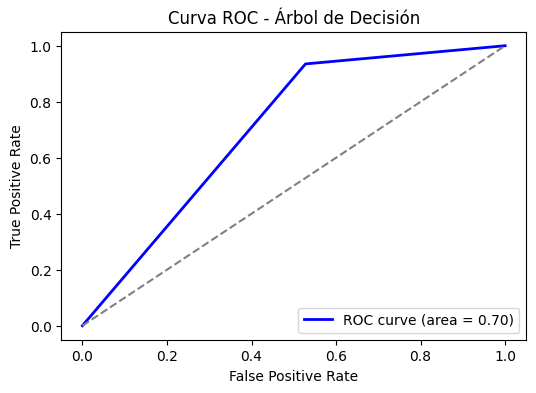

Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        36
           1       0.89      1.00      0.94       200

    accuracy                           0.90       236
   macro avg       0.95      0.67      0.72       236
weighted avg       0.91      0.90      0.88       236



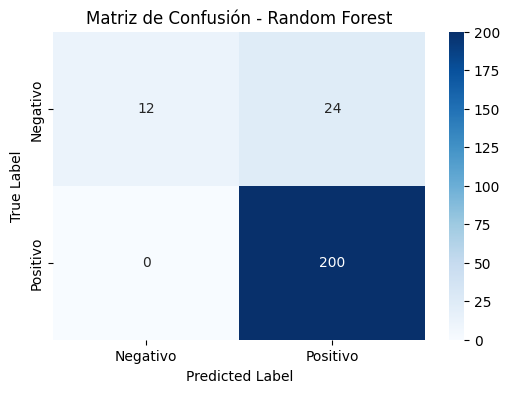

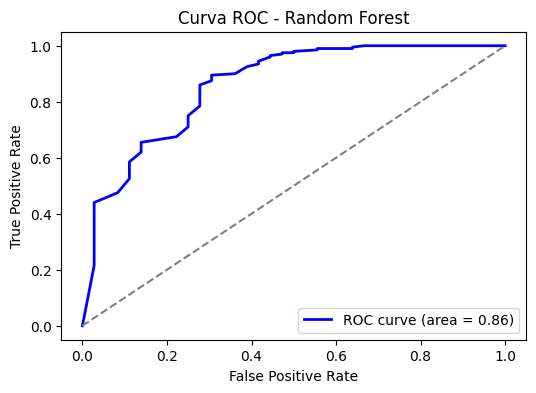

Regresión Logística:
              precision    recall  f1-score   support

           0       1.00      0.22      0.36        36
           1       0.88      1.00      0.93       200

    accuracy                           0.88       236
   macro avg       0.94      0.61      0.65       236
weighted avg       0.90      0.88      0.85       236



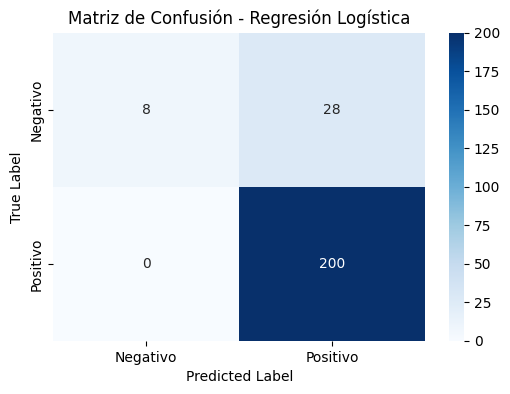

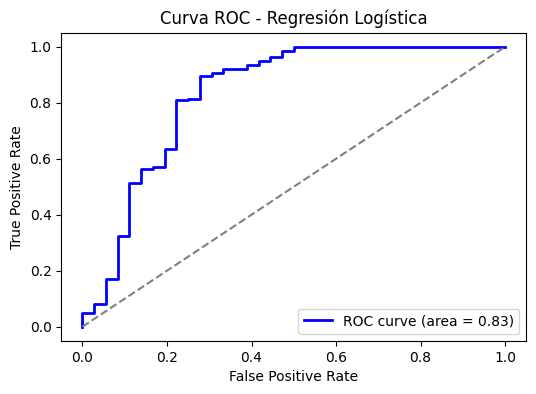

In [31]:
# Librerías adicionales para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Función para graficar matriz de confusión
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()

# Función para graficar curva ROC
def plot_roc_curve(y_test, y_pred_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

# Entrenamiento y evaluación de los modelos con visualizaciones

# 1. Árbol de Decisión
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_tfidf, y_train)
y_pred_tree = tree_model.predict(X_test_tfidf)
y_pred_tree_proba = tree_model.predict_proba(X_test_tfidf)[:, 1]

print("Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree))
plot_confusion_matrix(y_test, y_pred_tree, "Árbol de Decisión")
plot_roc_curve(y_test, y_pred_tree_proba, "Árbol de Decisión")

# 2. Random Forest
forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
forest_model.fit(X_train_tfidf, y_train)
y_pred_forest = forest_model.predict(X_test_tfidf)
y_pred_forest_proba = forest_model.predict_proba(X_test_tfidf)[:, 1]

print("Random Forest:")
print(classification_report(y_test, y_pred_forest))
plot_confusion_matrix(y_test, y_pred_forest, "Random Forest")
plot_roc_curve(y_test, y_pred_forest_proba, "Random Forest")

# 3. Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_tfidf, y_train)
y_pred_logistic = logistic_model.predict(X_test_tfidf)
y_pred_logistic_proba = logistic_model.predict_proba(X_test_tfidf)[:, 1]

print("Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))
plot_confusion_matrix(y_test, y_pred_logistic, "Regresión Logística")
plot_roc_curve(y_test, y_pred_logistic_proba, "Regresión Logística")


#Conclusión Final
Random Forest es el modelo preferido si el objetivo es maximizar el recall de los positivos, ya que identifica prácticamente todos los casos positivos. Sin embargo, genera más falsos positivos y puede ser menos interpretable.
Regresión Logística es la mejor opción para un balance entre ambas clases, proporcionando una buena precisión, interpretabilidad y menos falsos positivos en comparación con el Random Forest.
Árbol de Decisión tiene un rendimiento moderado y balanceado, aunque es superado en precisión y recall por los otros dos modelos en este caso.
En resumen, la elección del modelo depende del contexto y de la importancia relativa de los falsos positivos frente a los falsos negativos. Si necesitas identificar todos los positivos, elige Random Forest; si valoras la interpretabilidad y un buen balance entre ambas clases, Regresión Logística es la mejor opción.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos
df = pd.read_csv('Amazon.zip')


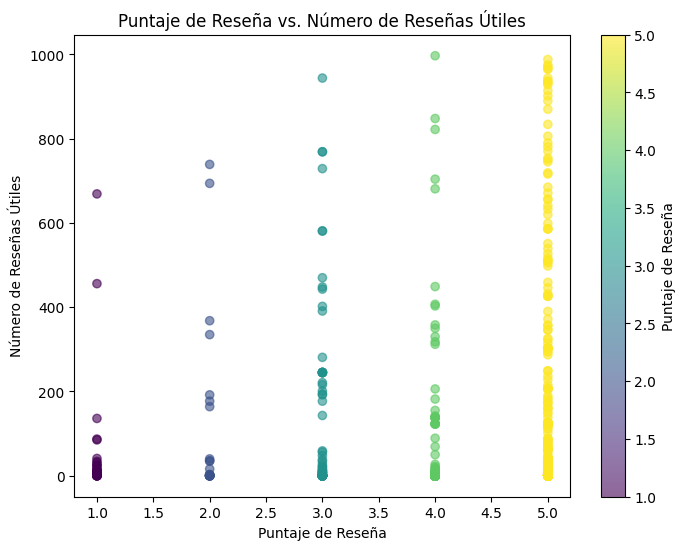

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(df['reviews.rating'], df['reviews.numHelpful'], c=df['reviews.rating'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Puntaje de Reseña')
plt.title('Puntaje de Reseña vs. Número de Reseñas Útiles')
plt.xlabel('Puntaje de Reseña')
plt.ylabel('Número de Reseñas Útiles')
plt.show()



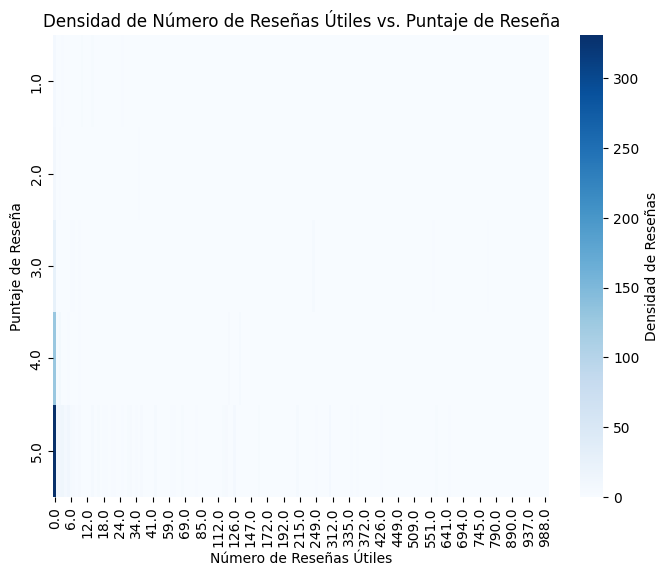

In [41]:
plt.figure(figsize=(8, 6))
heatmap_data = df.pivot_table(index='reviews.rating', columns='reviews.numHelpful', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='Blues', cbar_kws={'label': 'Densidad de Reseñas'})
plt.title('Densidad de Número de Reseñas Útiles vs. Puntaje de Reseña')
plt.xlabel('Número de Reseñas Útiles')
plt.ylabel('Puntaje de Reseña')
plt.show()


#Conclusión:
A partir de estos gráficos, podemos concluir que existe una correlación positiva entre el puntaje de la reseña y el número de reseñas útiles, ya que las reseñas con puntajes más altos tienden a recibir más reseñas útiles. Sin embargo, esta correlación no es perfecta, ya que existen reseñas de bajo puntaje que también han sido consideradas útiles y una variabilidad considerable dentro de cada puntaje.

<Figure size 800x600 with 0 Axes>

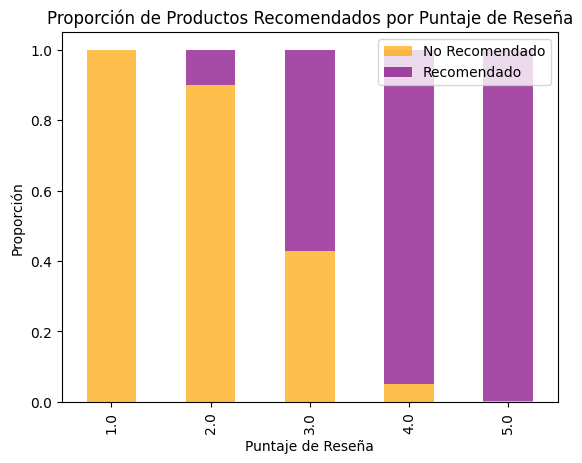

In [42]:
recomendados_por_puntaje = df.groupby('reviews.rating')['reviews.doRecommend'].value_counts(normalize=True).unstack()

plt.figure(figsize=(8, 6))
recomendados_por_puntaje.plot(kind='bar', stacked=True, color=['orange', 'purple'], alpha=0.7)
plt.title('Proporción de Productos Recomendados por Puntaje de Reseña')
plt.xlabel('Puntaje de Reseña')
plt.ylabel('Proporción')
plt.legend(['No Recomendado', 'Recomendado'])
plt.show()


<ipython-input-43-7d5518506421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='reviews.doRecommend', y='reviews.rating', data=df, palette='Set2')


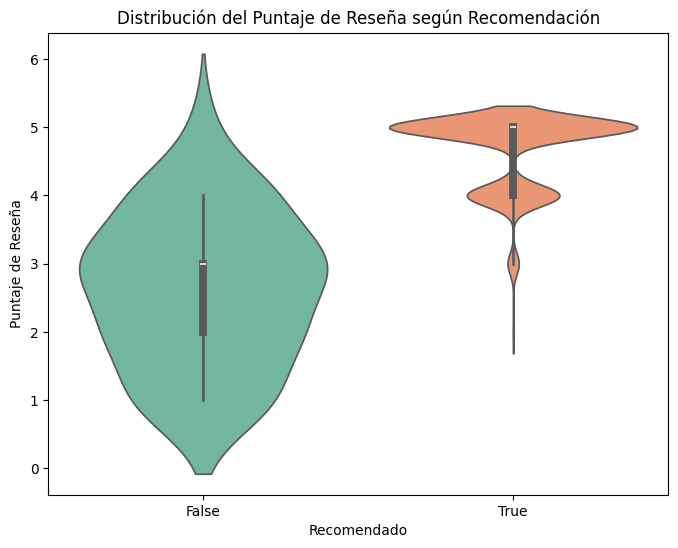

In [43]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='reviews.doRecommend', y='reviews.rating', data=df, palette='Set2')
plt.title('Distribución del Puntaje de Reseña según Recomendación')
plt.xlabel('Recomendado')
plt.ylabel('Puntaje de Reseña')
plt.show()


#Conclusión:
Este análisis respalda la hipótesis de que los productos con un puntaje de reseña más alto tienen una mayor probabilidad de ser recomendados. La diferencia entre los dos grupos sugiere una tendencia clara: los productos con calificaciones más altas son más propensos a ser recomendados, mientras que aquellos con calificaciones bajas tienden a no serlo.

<Figure size 800x600 with 0 Axes>

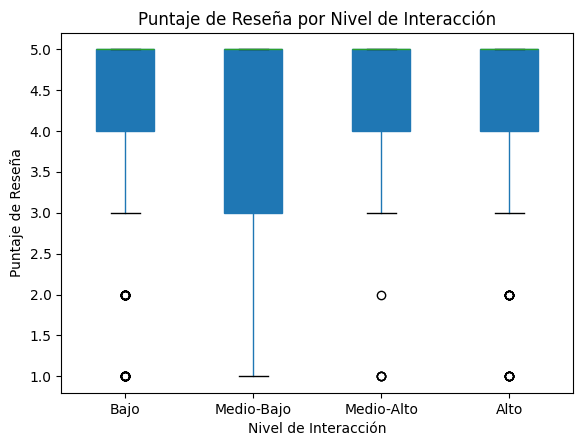

In [44]:

df['reviews.numHelpful'] = df['reviews.numHelpful'].fillna(0)

df['nivel_interaccion'] = pd.cut(df['reviews.numHelpful'],
                                 bins=[-1, 5, 15, 30, df['reviews.numHelpful'].max()],
                                 labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto'])
plt.figure(figsize=(8, 6))
df.boxplot(column='reviews.rating', by='nivel_interaccion', grid=False, patch_artist=True)
plt.title('Puntaje de Reseña por Nivel de Interacción')
plt.suptitle('')
plt.xlabel('Nivel de Interacción')
plt.ylabel('Puntaje de Reseña')
plt.show()




<ipython-input-45-0fe570ebbd45>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='nivel_interaccion', y='reviews.rating', data=df, palette="Pastel1")


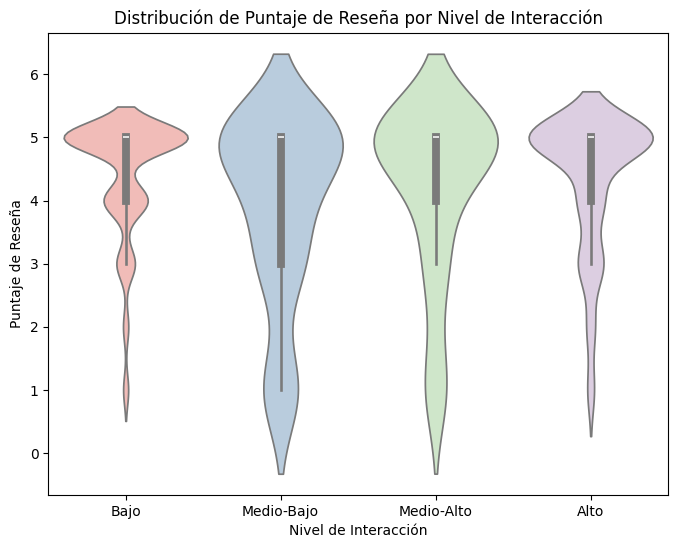

In [45]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='nivel_interaccion', y='reviews.rating', data=df, palette="Pastel1")
plt.title('Distribución de Puntaje de Reseña por Nivel de Interacción')
plt.xlabel('Nivel de Interacción')
plt.ylabel('Puntaje de Reseña')
plt.show()





#Conclusión:
Los gráficos sugieren que los productos con niveles más altos de interacción ("Medio-Alto" y "Alto") tienden a tener puntajes de reseña más altos y concentrados cerca de 4 y 5, mientras que los niveles de interacción "Bajo" y "Medio-Bajo" muestran mayor variabilidad, con algunos puntajes bajos. Esto apoya parcialmente tu hipótesis de que mayor interacción se asocia con puntajes de reseña más altos, aunque la relación no es totalmente consistente en todos los niveles.


### Conclusiones y Reflexiones Finales

A partir del análisis de los gráficos y la evaluación de las hipótesis, se pueden extraer las siguientes conclusiones generales:

- Correlación entre el Puntaje de Reseña y la Utilidad:

Existe una correlación positiva entre el puntaje de las reseñas y la percepción de utilidad por parte de otros usuarios. Las reseñas con puntajes altos tienden a ser vistas como más útiles, lo que podría indicar que, en general, las personas encuentran más valor en reseñas que reflejan una experiencia positiva. Sin embargo, también hay algunas reseñas de bajo puntaje consideradas útiles, lo que sugiere que los usuarios valoran la honestidad y la crítica constructiva, independientemente de si la experiencia fue positiva o negativa.

- Probabilidad de Recomendación según el Puntaje de Reseña:

Los productos con puntajes altos (4 y 5) tienen una mayor probabilidad de ser recomendados, mientras que los de puntajes bajos (1 y 2) tienden a no serlo. Esto sugiere que las calificaciones en plataformas de reseñas funcionan como un indicador sólido de recomendación para futuros compradores, ayudando a los usuarios a filtrar productos que probablemente satisfarán sus expectativas.

- Interacción y Calidad Percibida:

La interacción de los usuarios (medida por el número de reseñas útiles) también muestra una relación con el puntaje de la reseña. Productos con mayor interacción suelen tener puntajes de reseña más altos, lo que puede deberse a que estos productos generan experiencias más memorables o satisfactorias que los usuarios desean compartir. Aunque la relación entre interacción y puntaje no es totalmente consistente, los productos que generan mayor participación tienden a ser valorados positivamente.

#Reflexiones Finales

Este análisis respalda la idea de que los puntajes y la interacción en plataformas de reseñas son indicadores útiles de la calidad percibida y de la probabilidad de recomendación. Algunos puntos clave que pueden servir de reflexión:

Importancia de las Reseñas Positivas: Las reseñas con puntajes altos y recomendaciones positivas no solo refuerzan la percepción de calidad, sino que también influyen en la visibilidad del producto al ser consideradas útiles y destacadas por otros usuarios. Esto sugiere que las empresas deben fomentar experiencias de calidad para asegurar una retroalimentación positiva.

Valor de la Crítica Constructiva: Las reseñas de bajo puntaje pueden ser vistas como útiles, indicando que los consumidores valoran la transparencia. Las empresas pueden aprovechar las críticas constructivas para identificar áreas de mejora y responder a las necesidades de los clientes.

Interacción como Indicador de Interés: Los niveles de interacción pueden reflejar el interés de los usuarios en ciertos productos. Fomentar la interacción, a través de comentarios útiles y respuestas a las reseñas, puede fortalecer la confianza de otros usuarios y contribuir a la percepción de un producto como confiable.

En conclusión, la calificación, la recomendación y la interacción de los usuarios son factores entrelazados que pueden dar a los futuros compradores una perspectiva confiable sobre un producto. Para las empresas y plataformas, esta información es valiosa, ya que pueden usar estas métricas para mejorar la experiencia del usuario, optimizar la calidad de sus productos y desarrollar estrategias de marketing más efectivas.





